In [47]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [16]:
quandl.ApiConfig.api_key  = 'sG6acWQXKeSHrRPHRvu4'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


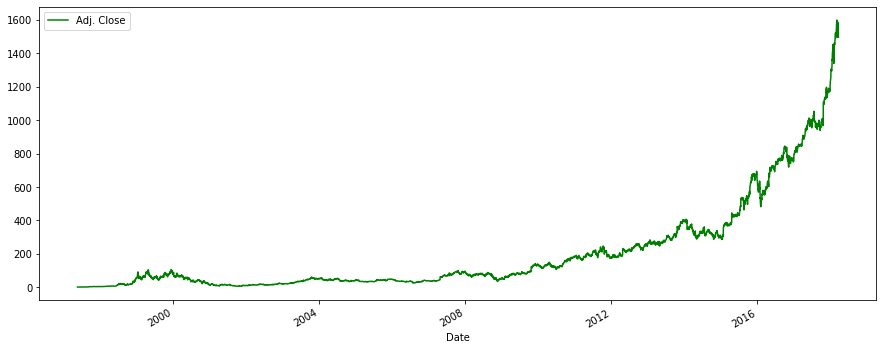

In [35]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc = 'upper left')
plt.show()

In [36]:
forecast = 30
df['Pred'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Pred'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Pred'])
y = y[:-forecast]

/var/folders/g1/pjc5pm_d79j6473q8b5zq5380000gn/T/ipykernel_19183/2994897262.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Pred'],1))


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)

confidence = clf.score(X_test,y_test)
forecast_predicted = clf.predict(X_forecast)


[1501.60014516 1540.48432638 1551.88141399 1537.97292333 1558.89418778
 1574.39890919 1576.35695225 1592.57465674 1615.93283348 1605.32321971
 1605.82337202 1585.6044491  1592.8406952  1617.69932885 1632.62940719
 1640.46157944 1647.76167476 1676.52575299 1697.27675283 1686.41174215
 1689.41265597 1680.17580066 1668.85320382 1640.38708867 1684.63460524
 1679.68628989 1639.50384098 1587.8498137  1652.01829011 1589.43540292]


(17282.0, 18029.5)

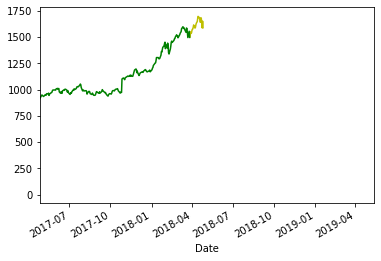

In [48]:
dates = pd.date_range(start = "2018-03-28", end = "2018-04-26")
plt.plot(dates,forecast_predicted, color = 'y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))